In [5]:
import pandas as pd

In [6]:
data = pd.read_csv("mobile_amazon-reviews-scraper.csv")
data.head()

country countryCode                       reviewTitle  \
0   India         NaN                              Good   
1   India         NaN  Decent phone with some drawbacks   
2   India         NaN                      Good product   
3   India         NaN                            ðŸ“· Best   
4   India         NaN               Not Fully Optimized   

                           reviewedIn                 reviewReaction  \
0  Reviewed in India on 10 April 2023  One person found this helpful   
1  Reviewed in India on 15 March 2023   26 people found this helpful   
2   Reviewed in India on 3 April 2023  One person found this helpful   
3   Reviewed in India on 4 April 2023    6 people found this helpful   
4  Reviewed in India on 24 March 2023    9 people found this helpful   

                                   reviewDescription  ratingScore        date  
0                          All over good performance            4  2023-04-10  
1  Pros:Fast processor, no lag in playing games ,...            4  2023-03-15  
2                                      Valueof money            4  2023-04-03  
3                                     Battery ðŸ”‹ waaa            4  2023-04-04  
4  The performance of the phone is average. Often...            4  2023-03-24

In [7]:
data['reviewDescription'] = data['reviewDescription'].str.replace("[^a-zA-Z#]", " ")

C:\Users\Joel Dsouza\AppData\Local\Temp\ipykernel_447092\1257952810.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['reviewDescription'] = data['reviewDescription'].str.replace("[^a-zA-Z#]", " ")


In [8]:
data['reviewDescription'] = data['reviewDescription'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [9]:
data['reviewDescription'] = data['reviewDescription'].apply(lambda x:x.lower())

In [10]:
tokenized_tweet = data['reviewDescription'].apply(lambda x: x.split())          
tokenized_tweet.head()

0                            [over, good, performance]
1    [pros, fast, processor, playing, games, using,...
2                                     [valueof, money]
3                                      [battery, waaa]
4    [performance, phone, average, often, there, sl...
Name: reviewDescription, dtype: object

In [11]:
data = pd.read_csv("amazonsentiments.csv")

In [12]:
import matplotlib.pyplot as plt

In [14]:
data['Sentiment'] = data['Sentiment Scores'].apply(lambda s : 'Positive' if s > 0 else ('Neutral' if s == 0 else 'Negative'))

In [15]:
data.Sentiment.value_counts()

Positive    60
Neutral     14
Negative     6
Name: Sentiment, dtype: int64

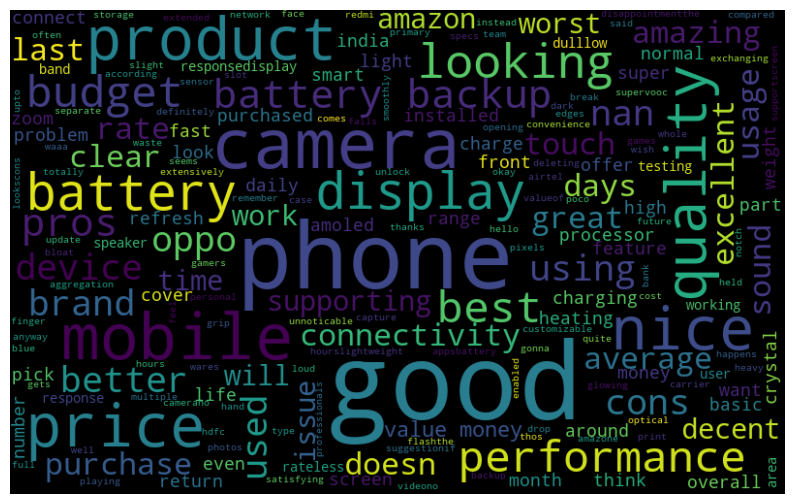

In [18]:
all_words = ' '.join([str(text) for text in data['reviewDescription']])
from wordcloud import WordCloud     
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

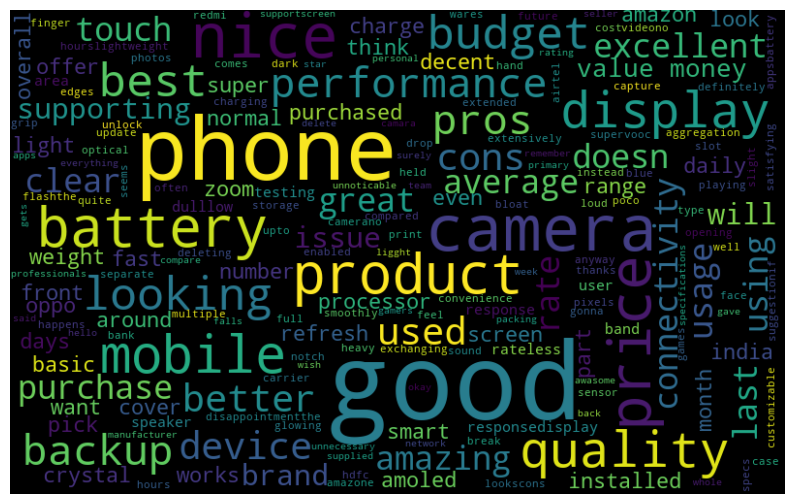

In [19]:
all_words_posi = ' '.join([text for text in data['reviewDescription'][data.Sentiment == 'Positive']])

wordcloud_posi = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_posi)               
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_posi, interpolation="bilinear")
plt.axis('off')
plt.show()

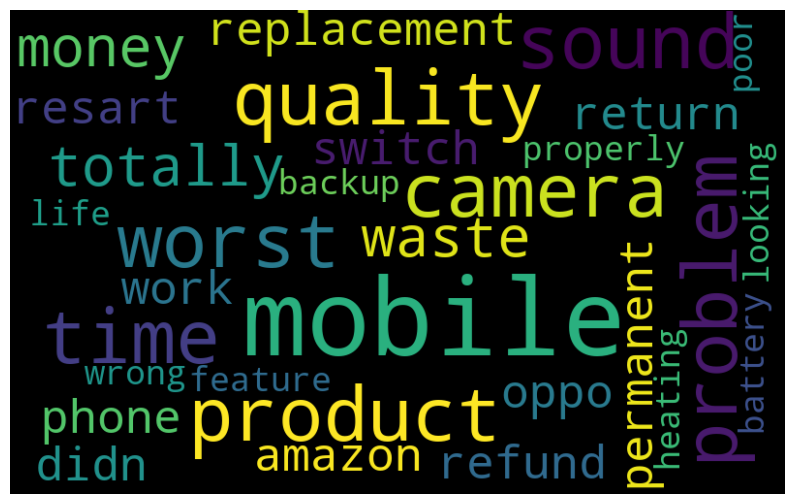

In [20]:
all_words_nega = ' '.join([text for text in data['reviewDescription'][data.Sentiment == 'Negative']])

wordcloud_nega = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_nega)               
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_nega, interpolation="bilinear")
plt.axis('off')
plt.show()